Implementation of the Rodriguez-Laio clustering method
------
(*Science*, 2014, **344**, 1492-1495)

In [1]:
import numpy as np
import scipy.spatial as ss
import rlcluster as rlc
from matplotlib import pyplot as plt
%matplotlib inline

**Let's begin with some data.**

In [2]:
points = []
for i in range(600):
    t = np.pi * 0.25 * np.random.normal()
    r = 1.0 + 0.1 * np.random.normal()
    points.append([r * np.sin(t), r * np.cos(t)])
for i in range(1000):
    t = np.pi * 0.25 * np.random.normal()
    r = 2.0 + 0.1 * np.random.normal()
    points.append([r * np.sin(t), r * np.cos(t)])

for i in range(1000):
    x = 3.0 + 0.2 * np.random.normal()
    y = 2.0 + 0.5 * np.random.normal()
    points.append([x,y])

for i in range(100):
    x = -2 + np.random.random() * 6.0
    y = -2 + np.random.random() * 6.0
    points.append([x,y])

points = np.array(points)

**Calculate the distance matrix and then cluster**

In [3]:
D = ss.distance.pdist(points)
result = rlc.cluster(ss.distance.squareform(D))

**Plot the original data, the clustering, and the decision graph**

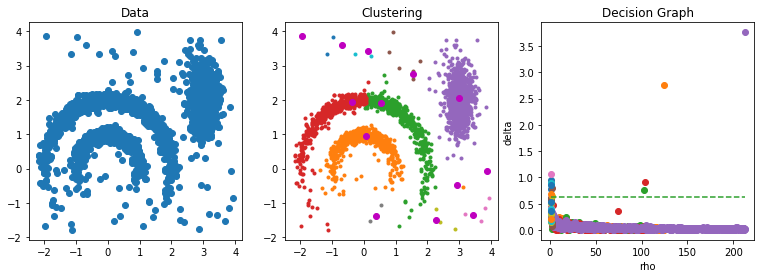

In [4]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches((13,4))
axes[0].set_title('Data')
axes[0].plot(points[:,0], points[:,1], 'o')

axes[1].set_title('Clustering')
for cid in np.unique(result.assignments):
    axes[1].plot(points[result.assignments==cid, 0], points[result.assignments==cid, 1], '.')
axes[1].plot(points[result.centres, 0], points[result.centres, 1], 'om')

axes[2].set_title('Decision Graph')
axes[2].set_xlabel('rho')
axes[2].set_ylabel('delta')
rlc.decision_graph(result, axes[2])

Now histograms. Start with a density map:

In [29]:
n = 200
nc = 3
H = np.zeros((n, n))
mu = np.random.random(nc)
sigma2 = np.random.random(nc) * n
xc = np.random.randint(0, n, nc)
yc = np.random.randint(0, n, nc)
fac = 1.0/(2.0 * np.pi * sigma2)
def fn(x,y):
    v = 0.0
    for i in range(nc):
        dx = x - xc[i]
        dy = y - yc[i]
        v += fac[i] * np.exp(-(dx*dx+dy*dy)/(2 * sigma2[i]))
    return v
for i in range(n):
    for j in range(n):
        H[i,j] = fn(i, j)

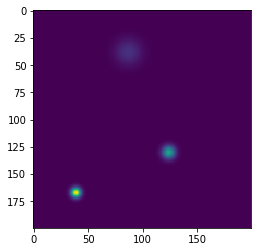

In [30]:
plt.imshow(H)

In [31]:
indices = np.unravel_index(range(len(H.flatten())), H.shape)

In [32]:
d = ss.distance.pdist(np.array(indices).T)

In [33]:
print(ss.distance.squareform(d).shape)

(40000, 40000)


In [34]:
result2 = rlc.cluster(ss.distance.squareform(d), rho=H.flatten(), sigma=2.0)

KeyboardInterrupt: 

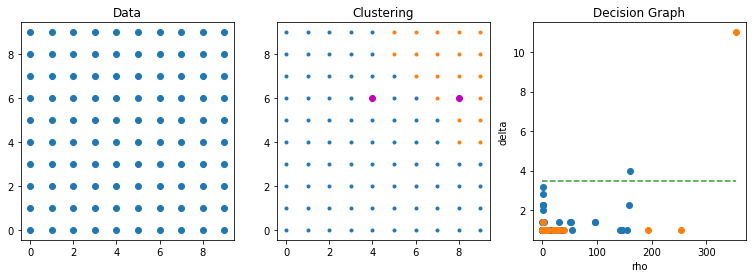

In [11]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches((13,4))
axes[0].set_title('Data')
axes[0].plot(indices[0], indices[1], 'o')

axes[1].set_title('Clustering')
for cid in np.unique(result2.assignments):
    axes[1].plot(indices[0][result2.assignments==cid], indices[1][result2.assignments==cid], '.')
axes[1].plot(indices[0][result2.centres], indices[1][result2.centres], 'om')

axes[2].set_title('Decision Graph')
axes[2].set_xlabel('rho')
axes[2].set_ylabel('delta')
rlc.decision_graph(result2, axes[2])